In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
isp_data = pd.read_csv('../files/isp_data.csv')

In [4]:
isp_data

,image_path,ISP,date,amount,year,month
0,../Data/Internet_bills_dialog/Images\1.png,Dialog,2022-11-04,2890.44,2022,11
1,../Data/Internet_bills_dialog/Images\10.png,Dialog,2023-01-04,2800.00,2023,1
2,../Data/Internet_bills_dialog/Images\11.png,Dialog,2023-01-26,4200.00,2023,1
3,../Data/Internet_bills_dialog/Images\12.png,Dialog,2023-01-26,4000.00,2023,1
4,../Data/Internet_bills_dialog/Images\2.png,Dialog,2022-03-23,500.00,2022,3
5,../Data/Internet_bills_dialog/Images\3.png,Dialog,2022-05-31,800.00,2022,5
6,../Data/Internet_bills_dialog/Images\4.png,Dialog,2022-07-04,2226.56,2022,7
7,../Data/Internet_bills_dialog/Images\5.png,Dialog,2022-07-15,800.00,2022,7
8,../Data/Internet_bills_dialog/Images\6.png,Dialog,2022-08-07,800.00,2022,8
9,../Data/Internet_bills_dialog/Images\7.png,Dialog,2022-08-28,4387.23,2022,8


In [17]:
monthly_payments = isp_data.groupby(['ISP','year', 'month'])['amount'].sum().reset_index()

monthly_payments = pd.DataFrame(monthly_payments)

monthly_payments

,ISP,year,month,amount
0,Dialog,2022,3,500.00
1,Dialog,2022,5,800.00
2,Dialog,2022,7,3026.56
3,Dialog,2022,8,5187.23
4,Dialog,2022,11,7790.44
5,Dialog,2023,1,11000.00
6,SLT,2022,2,1513.77
7,SLT,2022,11,11045.50
8,SLT,2022,12,7618.15
9,SLT,2023,2,7317.28


C:\Users\User\AppData\Local\Temp\ipykernel_3564\3055205385.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="date", y="amount", hue="ISP", ci=None)


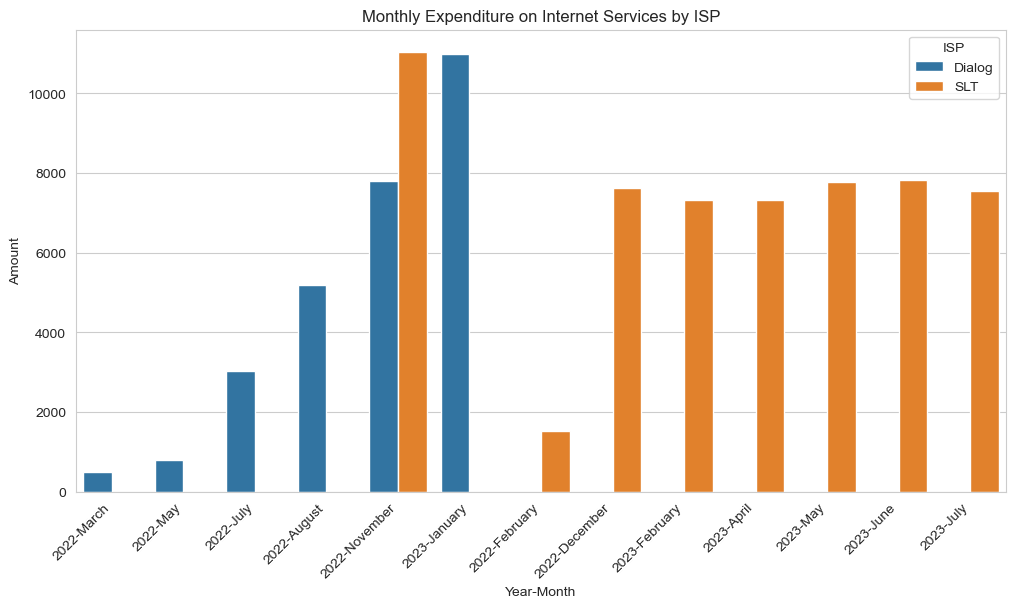

In [24]:
# Create a custom date column in the format 'YYYY-Month'
df['date'] = df['year'].astype(str) + '-' + df['month'].apply(lambda x: calendar.month_name[x])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=df, x="date", y="amount", hue="ISP", ci=None)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel("Year-Month")
plt.ylabel("Amount")
plt.title("Monthly Expenditure on Internet Services by ISP")

# Show the plot
plt.savefig('plot.png')